#  Salaries in Big Techs

## Phase II: Data collection and exploratory data analysis report
Author: James Guo (zg268) <br> Date : 11/19/2021

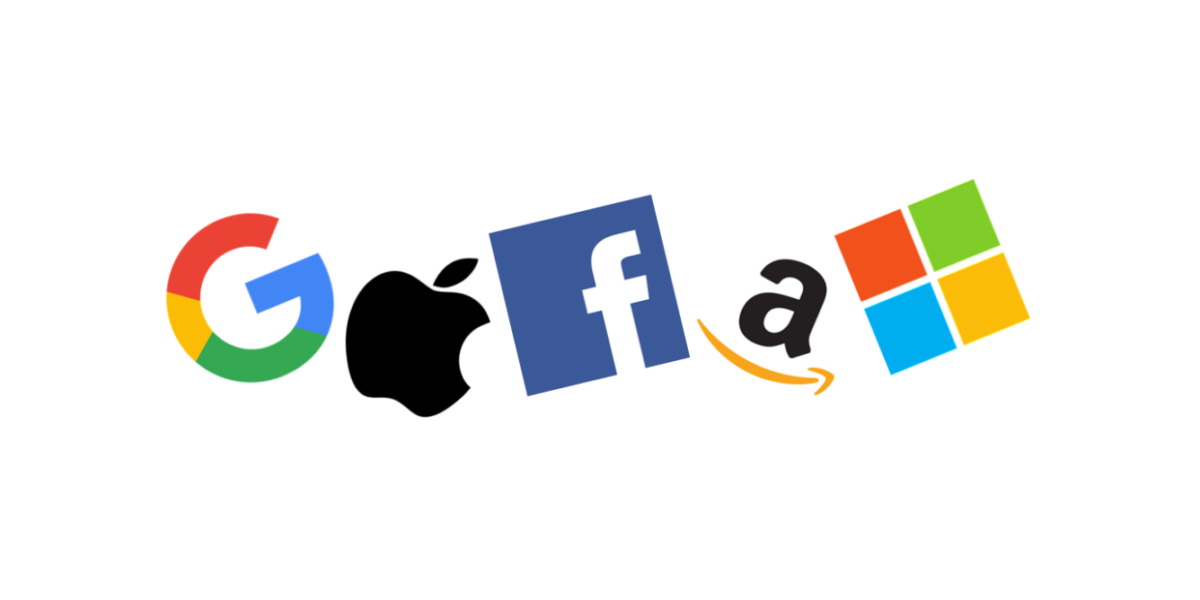

[ImageSource](https://chioualexander.medium.com/how-to-break-into-big-tech-as-a-software-engineer-a818322ad0b2)

### Research Question

In recent years, salaries in technology companies have attracted many people's attention, especially those interested in starting careers in the IT industry. Therefore, we want to investigate:<br><br>
- Company, location, years of experience, education levels, and races, what are the relationships between these factors and salaries in technology companies? Is there any factor(s) that stands out for contributing to salaries in technology companies?
- Are there potential relationships between predictor variables, for example, between education levels and years of experience?

One potential outcome of data analysis and modeling in this project is to support people making decisions on which company to work, where to work, whether their education levels are an advantage or a disadvantage, and if their ethnicities are dominant in the tech company job market.

### Data collection and cleaning

In [1]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('white')
import statistics
%matplotlib inline

The dataset `Levels_Fyi_Salary_Data.csv` was downloaded from: https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries. The author Jack Ogozaly scraped data off [levels.fyi](http://levels.fyi), and he cleaned the raw data moderately and exported this dataset as `Levels_Fyi_Salary_Data.csv`. Now I am going to load `Levels_Fyi_Salary_Data.csv` as a pandas dataframe named `salary`.

In [2]:
salary = pd.read_csv("Levels_Fyi_Salary_Data.csv")

First, to have a basic understanding of `salary`, I will display its columns and first few rows, and the size of `salary`.

- **Original columns**

In [3]:
print(salary.columns)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')


- **First few rows**

In [4]:
salary.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


- **Size**

In [5]:
salary.shape

(62642, 29)

In [6]:
print('The number of rows in `salary` is {}.'.format(salary.shape[0]))
print('The number of columns in `salary` is {}.'.format(salary.shape[1]))

The number of rows in `salary` is 62642.
The number of columns in `salary` is 29.


I observed many `NaN` (missing values) in this dataframe. The first step I will take is dropping all observations in `salary` that contain missing values and assigning the cleaned dataframe to a new variable called `salary_clean`. Then I will reset the index of `salary_clean` in place and do not keep the original index in a new column. <br><br>**Because `salary` has an enormous sample size (62642 observations!), we are not afraid of creating biases by dropping some of them.**<br><br>And we display the first few rows of `salary_clean`.

In [7]:
salary_clean = salary.dropna()
salary_clean.reset_index(drop=True, inplace=True)
salary_clean.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
1,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
2,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
3,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
4,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


There are many columns in `salary_clean` that is not useful. I will drop columns that I do not want, and display the updated columns in `salary_clean`.

In [8]:
pd.options.mode.chained_assignment = None
salary_clean.drop(columns=['level', 'tag', 'otherdetails', 'dmaid', 'stockgrantvalue', 'rowNumber', \
                           'Race', 'Education'], inplace=True)
salary_clean.columns

Index(['timestamp', 'company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'bonus', 'gender',
       'cityid', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'],
      dtype='object')

The column names are not succinct enough. We plan to rename all column names to lower letters, just for easier reference.

In [9]:
salary_clean.columns = salary_clean.columns.str.lower()
salary_clean.columns

Index(['timestamp', 'company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'bonus', 'gender',
       'cityid', 'masters_degree', 'bachelors_degree', 'doctorate_degree',
       'highschool', 'some_college', 'race_asian', 'race_white',
       'race_two_or_more', 'race_black', 'race_hispanic'],
      dtype='object')

Above, I performed general cleaning on the dataset. Next, I want to specifically look into each column and clean improvable columns to get a dataframe of higher quality. Below is the column that I think more data cleaning is needed.

- `timestamp`

In [10]:
salary_clean['timestamp'].dtypes

dtype('O')

For the column `timestamp`, the data type is `object`. I will convert datatype from `object` to `timestamp`. And we are not interested in hour level. We want the format of "MM/DD/YYYY", so I will reformat `timestamp` in `salary_clean` to datatype timestamp with the format of "MM/DD/YYYY". I will display the first few rows of `salary_clean`.

In [11]:
pd.options.mode.chained_assignment = None
x = 0
for i in salary_clean['timestamp']:
    pos = i.find(' ')
    salary_clean.loc[x, 'timestamp'] = i[:][:pos]
    x += 1

In [12]:
salary_clean['timestamp'] = pd.to_datetime(salary_clean['timestamp'], format='%m/%d/%Y')

In [13]:
salary_clean.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,bonus,gender,...,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,race_hispanic
0,2020-01-27,Google,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,210000.0,45000.0,Male,...,0,0,1,0,0,1,0,0,0,0
1,2020-07-03,Microsoft,Software Engineer,136000,"Redmond, WA",3.0,2.0,124000.0,11000.0,Male,...,0,1,0,0,0,0,0,1,0,0
2,2020-07-03,Google,Software Engineer,337000,"San Bruno, CA",6.0,6.0,177000.0,36000.0,Male,...,0,1,0,0,0,1,0,0,0,0
3,2020-07-03,Microsoft,Software Engineer,222000,"Seattle, WA",4.0,4.0,164000.0,20000.0,Male,...,1,0,0,0,0,1,0,0,0,0
4,2020-07-03,Blend,Software Engineer,187000,"San Francisco, CA",5.0,0.0,165000.0,0.0,Male,...,0,1,0,0,0,0,1,0,0,0


I will print the data type of each column in `salary_clean` and double-check if the data types of all columns are appropriate.

In [14]:
print(salary_clean.dtypes)

timestamp                  datetime64[ns]
company                            object
title                              object
totalyearlycompensation             int64
location                           object
yearsofexperience                 float64
yearsatcompany                    float64
basesalary                        float64
bonus                             float64
gender                             object
cityid                              int64
masters_degree                      int64
bachelors_degree                    int64
doctorate_degree                    int64
highschool                          int64
some_college                        int64
race_asian                          int64
race_white                          int64
race_two_or_more                    int64
race_black                          int64
race_hispanic                       int64
dtype: object


I am confident that I have finished cleaning data at this stage. I will export the cleaned dataframe `salary_clean` to a new CSV file named `salary_clean.csv`.

In [15]:
# salary_clean.to_csv('salary_clean.csv')

- **Data Documentation:**<br><br>
I have uploaded the downloaded **uncleaned** data named `Levels_Fyi_Salary_Data.csv`, and the **cleaned** data named `salary_clean.csv` to google drive: https://drive.google.com/drive/folders/1XGDV_Qp7B61RTdzt8gkhw0Q42PP1v5E5?usp=sharing.

### Data description

**1. What are the observations (rows) and the attributes (columns)?** <br>
- **columns**: <br>
`timestamp`: Time in the format of "MM/DD/YYYY" that the individual was recorded.<br>
`company`: Company name that the individual was in.<br>
`title`: The title of the individual in the company.<br>
`totalyearlycompensation`: Total yearly compensation of the individual.<br>
`location`: City location that the individual works.<br>
`yearsofexperience`: Years of Experience that the individual has.<br>
`yearsatcompany`: Years of experience that the individual has at this company.<br>
`basesalary`: Base salary of the individual.<br>
`bonus`: Bonus of the individual.<br>
`gender`: Gender of the individual.<br>
`cityid`: ID of `location`.<br>
`masters_degree`: 1 if the highest education level that the individual reaches is a master's degree, otherwise 0.<br>
`bachelors_degree`: 1 if the highest education level that the individual reaches is a bachelor's degree, otherwise 0.<br>
`doctorate_degree`: 1 if the highest education level that the individual reaches is a doctorate's degree, otherwise 0.<br>
`highschool`: 1 if the highest education level that the individual reaches is a high school degree, otherwise 0.<br>
`some_college`: 1 if the highest education level that the individual reaches is some college degree, otherwise 0.<br>
`race_asian`: 1 if the individual identified as asian, otherwise 0.<br>
`race_white`: 1 if the individual identified as white, otherwise 0.<br>
`race_two_or_more`: 1 if the individual identified at least two races, otherwise 0.<br>
`race_black`: 1 if the individual identified as black, otherwise 0.<br>
`race_hispanic`: 1 if the individual identified as hispanic, otherwise 0.<br><br>
- **observations:**<br>
Measure individual's circumstance

**2. Why was this dataset created?** <br><br>
The author collected salary records and the timestamp, company, level, title, location, years of experience, gender, education level, and race of the corresponding individual from top technology companies. He wanted to create a valuable dataset to compare and contrast what factor(s) contributes to salaries across different technology companies.

**3. Who funded the creation of the dataset?** <br><br>
The author is Jack Ogozaly. He scraped off [levels.fyi](http://levels.fyi) and generated the firsthand dataset. He was not paid to do so.

**4. What processes might have influenced what data was observed and recorded and what was not?** <br><br>
The author performed data scraping using `requests` on [levels.fyi](http://levels.fyi), which is an accurate platform to compare salaries across different technology companies, following the procedure introduced [here](https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e). The choice of website to scrape and a scraping method provided by an experienced product manager [Matt Grierson](https://www.linkedin.com/in/matthewgrierson) make the author's data recording very reliable. And because the sample size is so large (62642!), bias generated during the data collection process is reduced to a minimal level.

**5. What preprocessing was done, and how did the data come to be in the form that you are using?**<br><br>
The author scraped these data off [levels.fyi](http://levels.fyi) following the procedure introduced [here](https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e) and performed basic data cleaning techniques.

**6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?** <br><br>
No.

### Data limitations

- The original dataset created by Jack Ogozaly contains records from 2020 to 2021 only. I wanted to study the trend of salaries in recent years, but the dataset do not cross a time interval that is big enough to model and analyze the trend of salaries, so I abandoned this idea.<br><br>

### Exploratory data analysis

#### Summary of statistics

Because it's meaningless to analyze the descriptive statistics of categorical variables (values are 0 or 1), variables whose data types are not float or integer, and `cityid`, I will only include `totalyearlycompensation`, `yearsofexperience`, `yearsatcompany`, `basesalary`, and `bonus` for summary of statistics.

In [16]:
var_inclu = salary_clean[['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary','bonus']]
var_inclu.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus
count,21521,21521,21521,21521,21521
mean,197947,7.1269,2.70657,133897,18399.7
std,133123,5.8495,3.32822,57229.2,24801
min,10000,0,0,4000,0
25%,119000,3,0,100000,3000
50%,174000,6,2,135000,13000
75%,245000,10,4,165000,25000
max,4.98e+06,45,40,900000,900000


Summary of statistics provides general information about the sample data, such as mean, min, max, median, etc., to help me understand what the data should look like. For example, I noticed the maximum yearly salary in this sample is 4,980,000, which is crazy high. And for years of experience, 50% is 6 and 75% is 10, which means the number of people with 0-6 years of experience is equal to the number of people with 6-45, but the majority of the labor force (75%) of technology companies has experience no more than 10 years.

#### Correlation matrix

In [17]:
var_inclu.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus
totalyearlycompensation,1.000000,0.402809,0.167440,0.784558,0.540633
yearsofexperience,0.402809,1.000000,0.537457,0.421357,0.290519
yearsatcompany,0.167440,0.537457,1.000000,0.182941,0.139283
basesalary,0.784558,0.421357,0.182941,1.000000,0.406911
bonus,0.540633,0.290519,0.139283,0.406911,1.000000


- I noticed `basesalary` is strongly related to `totalyearlycompensation`, and `yearsofexperience` and `bonus` are somewhat related to `totalyearlycompensation`.
- I expected `yearsofcompany` would be strongly related to `totalyearlycompensation` because intuitively the longer a person works at this company, the higher salary he/she should get. However, it turns out the relationship between `yearsofcompany` and `totalyearlycompensation` is not strong enough.

#### Gender

- Count

Male: 17556
Female: 3863
Other: 102


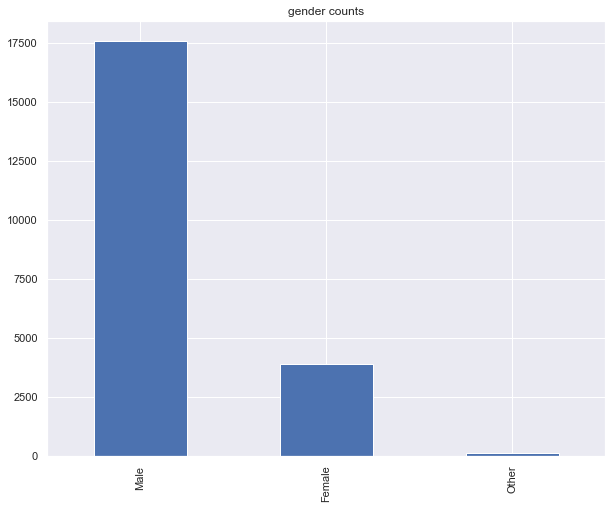

In [18]:
gender = salary_clean['gender'].value_counts()
for i in gender.index:
    print(i + ': {}'.format(gender[i]))

sns.set(rc = {'figure.figsize':(10, 8)})
gender.plot.bar();
plt.title('gender counts')
plt.show()

We can conclude that in technology companies, the majority of the labor force is male.

- Total yearly compensation

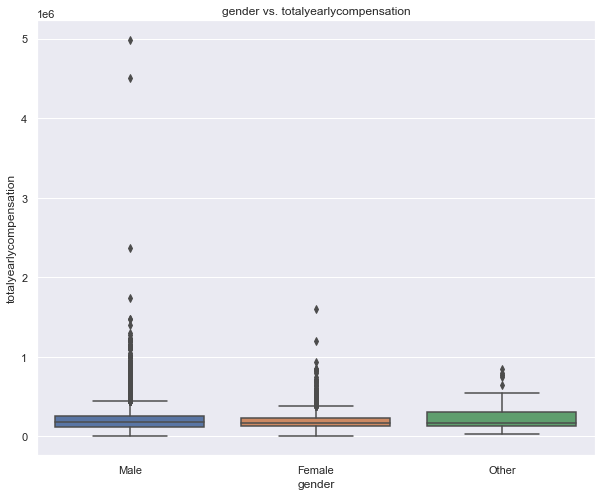

In [19]:
sns.set(rc = {'figure.figsize':(10, 8)})
sns.boxplot(x='gender', y='totalyearlycompensation', data=salary_clean);
plt.title('gender vs. totalyearlycompensation')
plt.show()

We can see a lot of outliers in this sample, which limits the information the boxplot can tell us. But generally, the median and range of yearly compensation of people who identify themselves as non-binary are the highest.

In [20]:
groupby_gender = salary_clean.groupby(by='gender')
print(groupby_gender['totalyearlycompensation'].mean())

gender
Female    186841.832772
Male      200207.393484
Other     229509.803922
Name: totalyearlycompensation, dtype: float64


We can see the mean of total yearly compensation of males is higher than that of females. The mean total yearly compensation that people who identify themselves as non-binary have is the highest.

In [21]:
print(groupby_gender['totalyearlycompensation'].median())

gender
Female    170000
Male      175000
Other     171500
Name: totalyearlycompensation, dtype: int64


We can see the median of total yearly compensation of males is the highest. The second highest are people who identify themselves as non-binary, and the third highest are females.

- Years of experience

In [22]:
print(groupby_gender['yearsofexperience'].mean())

gender
Female    6.365001
Male      7.297163
Other     6.676471
Name: yearsofexperience, dtype: float64


We can see the mean of years of experience of males is larger than that of females and others.

In [23]:
print(groupby_gender['yearsofexperience'].median())

gender
Female    5.0
Male      6.0
Other     5.0
Name: yearsofexperience, dtype: float64


We can see the median years of experience of males is larger than that of females and others.

- Base salary & bonus

In [24]:
print(groupby_gender['basesalary'].mean())

gender
Female    133432.565364
Male      133934.951014
Other     144970.588235
Name: basesalary, dtype: float64


We can see the mean base salary of people who identify themselves as non-binary is the highest. The second highest is males. The third highest is females.

In [25]:
print(groupby_gender['basesalary'].median())

gender
Female    133000.0
Male      135000.0
Other     140000.0
Name: basesalary, dtype: float64


We can see the median of base salary of people who identify themselves as non-binary is highest. The second highest is males. The third highest is females.

In [26]:
print(groupby_gender['bonus'].mean())

gender
Female    16679.523686
Male      18695.944406
Other     32568.627451
Name: bonus, dtype: float64


We can see the mean bonus of people who identify themselves as non-binary is the highest. The second highest is males. The third highest is females.

In [27]:
print(groupby_gender['bonus'].median())

gender
Female    12000.0
Male      13000.0
Other     12000.0
Name: bonus, dtype: float64


We can see the median bonus of males is the largest. The median bonus of females and people who identify themselves as non-binary are the same.

**Generally speaking, males take the dominant place at technology companies regarding total yearly compensation and years of experience. People who identify themselves as non-binary tend to have a statistically higher base salary and bonus.** 

#### Education

In [28]:
edu = salary_clean[['masters_degree', 'bachelors_degree', 'doctorate_degree', 'highschool', 'some_college']]
edu.columns = ['master', 'bachelor', 'doctorate', 'highschool', 'some_college']
edu.head()

,master,bachelor,doctorate,highschool,some_college
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


- Count

In [29]:
count = []
for i in edu.columns:
    temp = edu[i].value_counts()
    count.append(temp[1])

master           9061
bachelor        10902
doctorate         922
highschool        300
some_college      339
dtype: int64


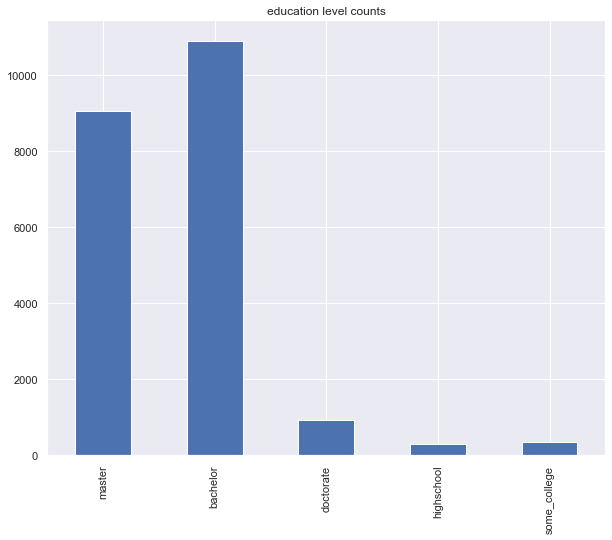

In [30]:
sns.set(rc = {'figure.figsize':(10, 8)})
edu_count = pd.Series(count, list(edu.columns))
print(edu_count)
edu_count.plot.bar();
plt.title('education level counts')
plt.show()

From the plot above, I noticed that a substantial portion of technology companies have at least a master's or bachelor's degree.

- Total year compensation

In [31]:
masters = salary_clean.loc[salary_clean['masters_degree'] == 1]
bachelors = salary_clean.loc[salary_clean['bachelors_degree'] == 1]
doctorate = salary_clean.loc[salary_clean['doctorate_degree'] == 1]
highschool = salary_clean.loc[salary_clean['highschool'] == 1]
some_college = salary_clean.loc[salary_clean['some_college'] == 1]
edu_list = [masters, bachelors, doctorate, highschool, some_college]
edu_list_name = ['masters', 'bachelors', 'doctorate', 'highschool', 'some_college']

In [32]:
for i in range(len(edu_list)):
    print(edu_list_name[i] + ':')
    print('mean total yearly compensation: {}'.format(edu_list[i]['totalyearlycompensation'].mean()))
    print('median total yearly compensation: {}'.format(edu_list[i]['totalyearlycompensation'].median()))
    print('\n')

masters:
mean total yearly compensation: 213429.86425339367
median total yearly compensation: 187000.0


bachelors:
mean total yearly compensation: 177561.36488717666
median total yearly compensation: 156000.0


doctorate:
mean total yearly compensation: 286015.18438177876
median total yearly compensation: 250000.0


highschool:
mean total yearly compensation: 184026.66666666666
median total yearly compensation: 161500.0


some_college:
mean total yearly compensation: 212117.99410029498
median total yearly compensation: 172000.0




We can see the mean and median of total year compensation of people with doctorate degrees are the highest. The second highest are people with master's degrees. The third highest are people with some college degrees. The lowest are people with bachelors' degrees.<br><br> Intuitively, the more education a person receives, the higher his/her income is, because education level and salaries are positively related. That makes sense because in this sample, people with doctorate degrees and master's degrees have very high salaries. <br><br>**Interestingly, people who have some college degrees have higher mean and median salaries than those of people having bachelor's degrees. One hypothesis can be people who have some college degrees begin their career in technology companies earlier- having more years of experience contribute to their higher salaries. I will focus on this issue and try to confirm my hypothesis when I analyze years of experience in the next part.**

- Years of experience

In [33]:
for i in range(len(edu_list)):
    print(edu_list_name[i] + ':')
    print('mean years of experience: {}'.format(edu_list[i]['yearsofexperience'].mean()))
    print('median years of experience: {}'.format(edu_list[i]['yearsofexperience'].median()))
    print('\n')

masters:
mean years of experience: 7.787440679836663
median years of experience: 6.0


bachelors:
mean years of experience: 6.456521739130435
median years of experience: 5.0


doctorate:
mean years of experience: 7.084598698481562
median years of experience: 6.0


highschool:
mean years of experience: 8.096666666666666
median years of experience: 7.0


some_college:
mean years of experience: 10.274336283185841
median years of experience: 9.0




Intuitively, higher education level means people start their careers late with fewer years of experience, and education level and years of experience should be negatively related.<br><br>

We can see the mean & median years of experience of people with bachelor's degrees is the lowest. The second lowest are people with doctorate degrees. People with some college degrees have the highest mean & median years of experience. Then second highest are people with high school degrees.<br><br>


One possible explanation for this may be: it is easier for people having some college degrees to start their career than people with high school degrees, so they have more years of experience, and the same reason between people with doctorate or master's degrees versus people with bachelor's degrees. <br><br>


And the analysis on years of experience confirmed my hypothesis in the last part that **people who have some college degrees tend to have higher salaries than people with bachelor's degrees because people who have some college degrees have more years of experience than people with bachelor's degrees.**

- Base salary & bonus

In [34]:
for i in range(len(edu_list)):
    print(edu_list_name[i] + ':')
    print('mean base salary: {}'.format(edu_list[i]['basesalary'].mean()))
    print('median base salary: {}'.format(edu_list[i]['basesalary'].median()))
    print('mean bonus: {}'.format(edu_list[i]['bonus'].mean()))
    print('median bonus: {}'.format(edu_list[i]['bonus'].median()))
    print('\n')

masters:
mean base salary: 142119.30250524226
median base salary: 143000.0
mean bonus: 20342.235956296216
median bonus: 15000.0


bachelors:
mean base salary: 123831.86571271326
median base salary: 125000.0
mean bonus: 15891.304347826086
median bonus: 10000.0


doctorate:
mean base salary: 170723.42733188721
median base salary: 165000.0
mean bonus: 29292.841648590023
median bonus: 24000.0


highschool:
mean base salary: 128006.66666666667
median base salary: 128500.0
mean bonus: 16493.333333333332
median bonus: 12000.0


some_college:
mean base salary: 142787.61061946902
median base salary: 138000.0
mean bonus: 19109.14454277286
median bonus: 12000.0




Intuitively, the higher the education level, the higher base salary and bonus should be. Education level and base salary and bonus should be positively related.<br><br>

The data above matches our expectations because the mean & median base salary and bonus of people with doctorate degrees are the highest. **One possible reason that the mean and median base salary and bonus of people with bachelor's degrees are lower than those of people with some college degrees or high school degrees is, people with bachelor's degrees tend to have fewer years of experience than people who do not have bachelor's degrees but start their careeres earlier.**

**Generally, people with doctorate degrees take dominance in yearly salaries and base salaries and bonuses. However, they do not have as much experience as people who did not reach doctorate degrees but started their careers earlier.**

#### Race

- Count

In [35]:
race = salary_clean[['race_asian', 'race_white', 'race_two_or_more', 'race_black', 'race_hispanic']]
race.columns = ['asian', 'white', 'two_or_more', 'black', 'hispanic']
race.head()

,asian,white,two_or_more,black,hispanic
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [36]:
count = []
for i in race.columns:
    temp = race[i].value_counts()
    count.append(temp[1])

asian          11381
white           7653
two_or_more      763
black            662
hispanic        1063
dtype: int64


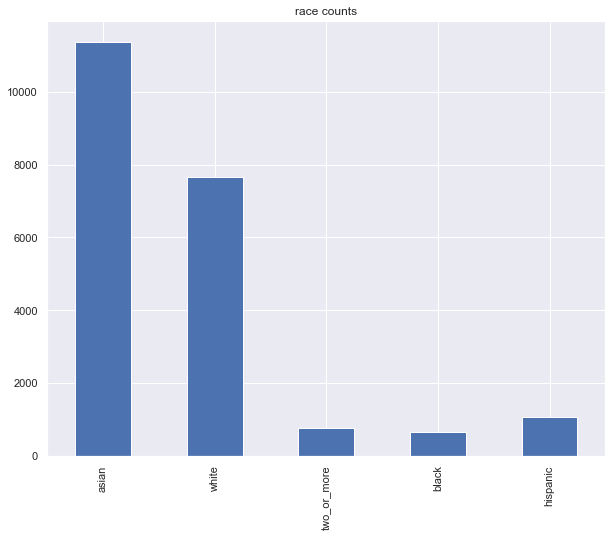

In [37]:
race_count = pd.Series(count, list(race.columns))
print(race_count)
sns.set(rc = {'figure.figsize':(10, 8)})
race_count.plot.bar();
plt.title('race counts')
plt.show()

I noticed people who identify themselves as Asians and Whites comprised the majority of the labor force market of technology companies.

- Total year compensation

In [38]:
asian = salary_clean.loc[salary_clean['race_asian'] == 1]
white = salary_clean.loc[salary_clean['race_white'] == 1]
two_more = salary_clean.loc[salary_clean['race_two_or_more'] == 1]
black = salary_clean.loc[salary_clean['race_black'] == 1]
hispanic = salary_clean.loc[salary_clean['race_hispanic'] == 1]
race_list = [asian, white, two_more, black, hispanic]
race_list_name = ['asian', 'white', 'two_more', 'black', 'hispanic']

In [39]:
for i in range(len(race_list)):
    print(race_list_name[i] + ':')
    print('mean total yearly compensation: {}'.format(race_list[i]['totalyearlycompensation'].mean()))
    print('median total yearly compensation: {}'.format(race_list[i]['totalyearlycompensation'].median()))
    print('\n')

asian:
mean total yearly compensation: 193199.54309814604
median total yearly compensation: 174000.0


white:
mean total yearly compensation: 206425.97674114726
median total yearly compensation: 175000.0


two_more:
mean total yearly compensation: 206760.15727391874
median total yearly compensation: 175000.0


black:
mean total yearly compensation: 181009.06344410876
median total yearly compensation: 158000.0


hispanic:
mean total yearly compensation: 191920.97836312323
median total yearly compensation: 168000.0




In this sample, the mean & median yearly salaries of people who identify themselves as **more than two races** and **white** are the highest. The mean & median yearly salaries of the black community are the lowest. We can conclude that in the labor force market of technology companies, people who identify themselves as black are at a disadvantage regarding salaries.

- Years of experience

In [40]:
for i in range(len(race_list)):
    print(race_list_name[i] + ':')
    print('mean years of experience: {}'.format(race_list[i]['yearsofexperience'].mean()))
    print('median years of experience: {}'.format(race_list[i]['yearsofexperience'].median()))
    print('\n')

asian:
mean years of experience: 6.5573323960987615
median years of experience: 5.0


white:
mean years of experience: 8.137723768456814
median years of experience: 7.0


two_more:
mean years of experience: 6.4888597640891215
median years of experience: 5.0


black:
mean years of experience: 5.936555891238671
median years of experience: 4.0


hispanic:
mean years of experience: 7.141110065851364
median years of experience: 5.0




We noticed the mean of years of experience of people who identify themselves as White and Hispanic are the largest, and the median of years of experience of White is the largest. We can conclude people who identify themselves as White tend to be more experienced than people of other races.

- Base salary & bonus

In [41]:
for i in range(len(race_list)):
    print(race_list_name[i] + ':')
    print('mean base salary: {}'.format(race_list[i]['basesalary'].mean()))
    print('median base salary: {}'.format(race_list[i]['basesalary'].median()))
    print('mean bonus: {}'.format(race_list[i]['bonus'].mean()))
    print('median bonus: {}'.format(race_list[i]['bonus'].median()))
    print('\n')

asian:
mean base salary: 129732.00948950005
median base salary: 135000.0
mean bonus: 17996.661101836395
median bonus: 13000.0


white:
mean base salary: 139938.32483993206
median base salary: 138000.0
mean bonus: 18829.34796811708
median bonus: 12000.0


two_more:
mean base salary: 138613.36828309306
median base salary: 135000.0
mean bonus: 20086.500655307995
median bonus: 13000.0


black:
mean base salary: 130821.75226586103
median base salary: 124000.0
mean bonus: 18374.622356495467
median bonus: 13000.0


hispanic:
mean base salary: 133518.34430856069
median base salary: 131000.0
mean bonus: 18424.270931326435
median bonus: 13000.0




We can see the mean & median base salary of people who identify themselves as White are the highest. And the mean & median bonus of people who identify themselves as two or more races are the highest. I also noticed the mean & median base salary of people who identify themselves as Asian are the lowest, and the mean & median bonus of Asians are the lowest.

**Generally, we can conclude that in the labor force market of technology companies, people who identify themselves as White are at an advantage in salaries, years of experience, and base salaries and bonuses, while people who identify themselves as Asian or Black tend to be at a disadvantage.**

#### Companies

- GAFAM <br><br> 
GAFAM is an abbreviation for Google, Apple, Facebook, Amazon, and Microsoft. These are also called the 'Big Five' because they are the most popular and well-reputed technologies companies in the United States and across the world. So we emphasize on 'GAFAM', and we are interested in relationships between salaries and other factors in these 5 companies.

    - Count

In [42]:
GAFAM = salary_clean.loc[salary_clean['company'].isin(['Google', 'Apple', 'Facebook', 'Amazon', 'Microsoft'])]

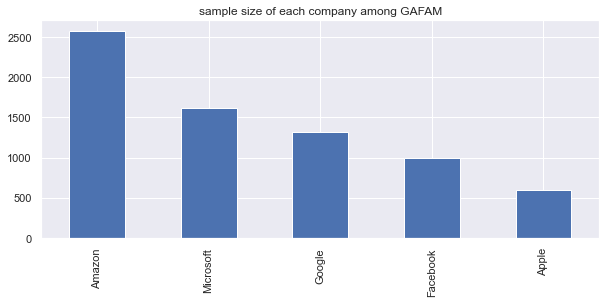

In [43]:
GAFAM_count = GAFAM['company'].value_counts()
sns.set(rc = {'figure.figsize':(10,4)})
GAFAM_count.plot.bar();
plt.title('sample size of each company among GAFAM')
plt.show()

In [44]:
print(GAFAM_count)

Amazon       2579
Microsoft    1618
Google       1314
Facebook      999
Apple         603
Name: company, dtype: int64


Amazon has the most significant number of observations in this sample, while Apple has the smallest number of observations.

    - Gender

In [45]:
GAFAM_cleaned_grouped = GAFAM.groupby(by=['company', 'gender'])
GAFAM_cleaned_grouped.size()

company    gender
Amazon     Female     435
           Male      2137
           Other        7
Apple      Female     114
           Male       485
           Other        4
Facebook   Female     196
           Male       801
           Other        2
Google     Female     238
           Male      1068
           Other        8
Microsoft  Female     323
           Male      1289
           Other        6
dtype: int64

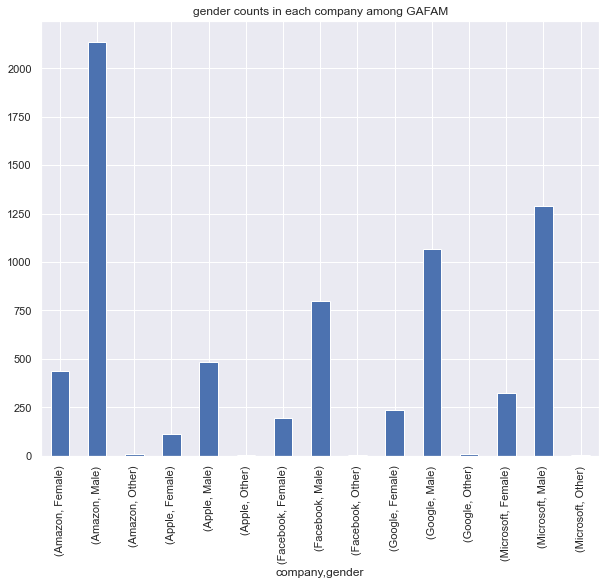

In [46]:
sns.set(rc = {'figure.figsize':(10,8)})
GAFAM_cleaned_grouped.size().plot(kind='bar');
plt.title('gender counts in each company among GAFAM')
plt.show()

From the numbers and graph `gender counts in each company among GAFAM`, across all 5 companies, we can see there are more males than females and others in GAFAM. The fact that more males than females and others confirms the previous conclusion that males take dominance in the labor force market of technology companies.

    - Total yearly compensation

In [47]:
GAFAM_cleaned = GAFAM[['company', 'totalyearlycompensation', 'yearsofexperience', 'basesalary','bonus', 'gender']]
GAFAM_cleaned_grouped = GAFAM_cleaned.groupby(by='company')

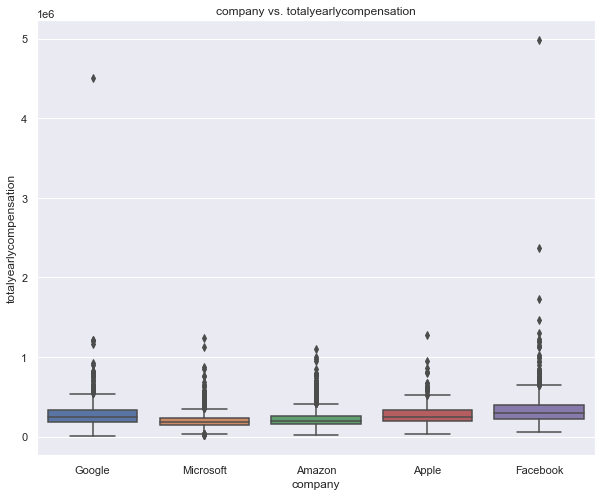

In [48]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(x='company', y='totalyearlycompensation', data=GAFAM_cleaned);
plt.title('company vs. totalyearlycompensation')
plt.show()

We can see there are a lot of outliers that limit the information the boxplot can tell. This may be caused by data miscollection. We want to remove those outliers to focues on the rest.

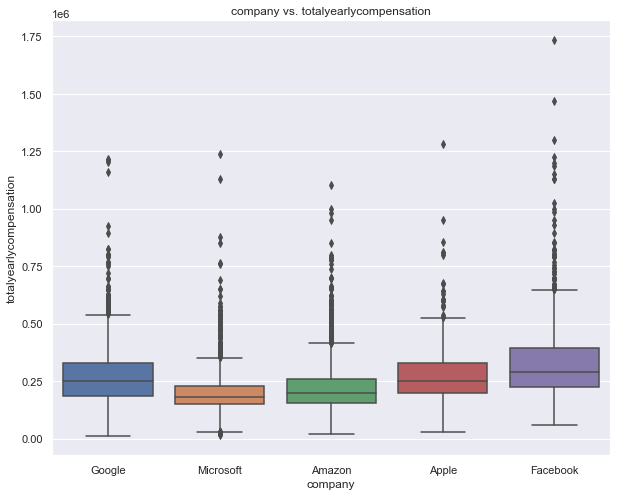

In [49]:
GAFAM_cleaned = GAFAM_cleaned[GAFAM_cleaned['totalyearlycompensation']<2000000].reset_index(drop = True)
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(x='company', y='totalyearlycompensation', data=GAFAM_cleaned);
plt.title('company vs. totalyearlycompensation')
plt.show()

From the boxplot above, we observe Facebook offers the highest salaries because of the biggest median salaries and the biggest range of salaries. The rank of median salaries among GAFAM from biggest to smallest is: Facebook, Google, Apple, Amazon, Microsoft. The rank of range of salaries among GAFAM from biggest to smallest is: Facebook, Google, Apple, Amazon, Microsoft.

    -  Years of experience

In [50]:
GAFAM_cleaned_grouped = GAFAM_cleaned.groupby(by='company')
GAFAM_cleaned_grouped['yearsofexperience'].median()

company
Amazon       5.0
Apple        6.0
Facebook     6.0
Google       5.0
Microsoft    6.0
Name: yearsofexperience, dtype: float64

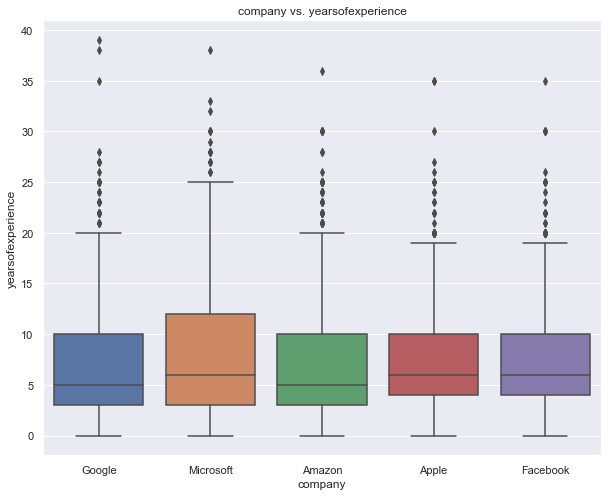

In [51]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(x='company', y='yearsofexperience', data=GAFAM_cleaned);
plt.title('company vs. yearsofexperience')
plt.show()

The numbers and the graph `company vs. yearsofexperience` show that people working at Microsoft, Apple, and Facebook are more experienced than people at other companies because the median of years of experience of these companies are the biggest among GAFAM.

    - Education

In [52]:
GAFAM_edu = GAFAM[['company', 'masters_degree', 'bachelors_degree', 'doctorate_degree', 'highschool', \
                           'some_college']]
GAFAM_edu_grouped = GAFAM_edu.groupby(by='company')

In [53]:
GAFAM_edu_grouped.sum()

,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college
company,,,,,
Amazon,1191,1247,85,32,25
Apple,283,235,72,3,10
Facebook,421,450,86,24,18
Google,523,622,139,14,16
Microsoft,710,791,58,31,28


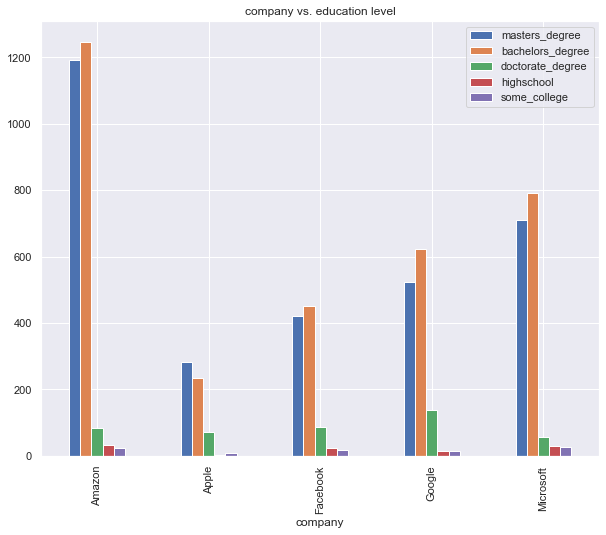

In [54]:
sns.set(rc = {'figure.figsize':(10,8)})
GAFAM_edu_grouped.sum().plot(kind='bar');
plt.title('company vs. education level')
plt.show()

The dataframe and the graph `company vs. education level` demonstrate that people with doctorate degrees and people with master's degrees are the majority of the labor force market of technology companies. In this sample, Amazon has the highest number of people with doctorate degrees and people with master's degrees among GAFAM, while Apple has the lowest.

    - Race

In [55]:
GAFAM_race = GAFAM[['company', 'race_asian', 'race_white', 'race_two_or_more', 'race_black', 'race_hispanic']]
GAFAM_race_grouped = GAFAM_race.groupby(by='company')

In [56]:
GAFAM_race_grouped.sum()

,race_asian,race_white,race_two_or_more,race_black,race_hispanic
company,,,,,
Amazon,1462,808,91,78,140
Apple,332,216,23,6,26
Facebook,523,350,35,25,66
Google,639,487,56,51,81
Microsoft,840,524,59,89,106


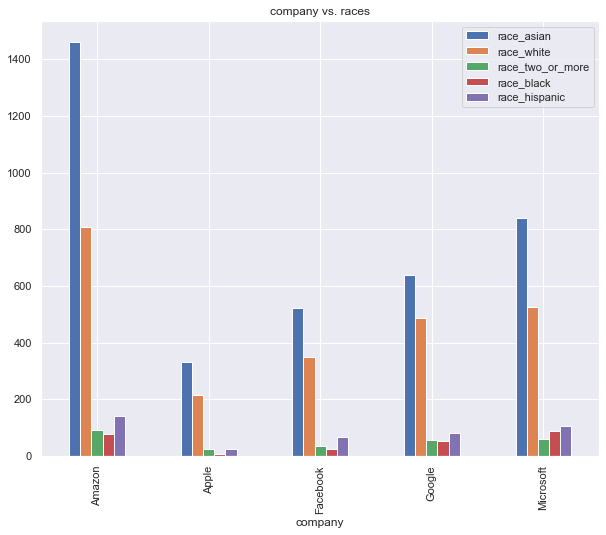

In [57]:
sns.set(rc = {'figure.figsize':(10,8)})
GAFAM_race_grouped.sum().plot(kind='bar');
plt.title('company vs. races')
plt.show()

The dataframe and the graph `company vs. races` show that Asians and Whites take the dominance at the labor force of each company across GAFAM, while people of black and two or more races are the minority.

#### United States vs. International

From the `location` column, we can see there are a lot of cities in the United States and some international cities. The first step we do is to separate domestic and international cities. We store domestic cities in a variable called `domestic_city` and international cities in `foreign_city`.

In [58]:
domestic_city = []
foreign_city = []
for i in salary_clean['location']:
    if i.count(',') == 1:
        if i not in domestic_city:
            domestic_city.append(i)
    else:
        if i not in foreign_city:
            foreign_city.append(i)

- United States

I will group cities in the United States into states and then perform analysis based on the state level. `state` is a list created to store states that are involved in this dataset.

In [59]:
state = []
for i in domestic_city:
    if i[-2:] not in state:
        state.append(i[-2:])

In [60]:
print(state)

['CA', 'WA', 'TX', 'AZ', 'NY', 'IL', 'MA', 'NC', 'VA', 'CO', 'FL', 'WI', 'DC', 'OR', 'MI', 'MN', 'MO', 'PA', 'UT', 'NJ', 'TN', 'LA', 'GA', 'AR', 'IA', 'OH', 'MD', 'IN', 'MT', 'RI', 'DE', 'OK', 'NV', 'CT', 'AL', 'SC', 'KS', 'KY', 'WV', 'MS', 'ID', 'NE', 'HI', 'NH', 'NM', 'ND', 'VT', 'WY', 'ME']


We want to focus on the sample size of each state and the mean and median salaries of the corresponding state. I will create a dictionary called `dict_state`, whose values document the index in the cleaned dataset (on position 0) and salaries (on position 1) of the corresponding state.

In [61]:
dict_state = {}
for i in state:
    dict_state[i] = [[], []]

for i in salary_clean.index:
    location = salary_clean.loc[i, 'location']
    key = location[-2:]
    if location.count(',') == 1:
        dict_state[key][0].append(i)
        dict_state[key][1].append(salary_clean.loc[i, 'yearsofexperience'])

Now I will study sample size and mean & median salaries of each state separately.

    - Sample sizes

I want to focus on states whose sample sizes are bigger than **50** for later analysis. Otherwise, the uncoverage bias caused by a tiny sample size will disrupt my research and analysis reliability.

In [62]:
state_name = []
sample_size = []
state_salary = []
for i in dict_state.keys():
    if len(dict_state[i][0]) > 50:
        state_name.append(i)
        sample_size.append(len(dict_state[i][0]))
        state_salary.append(dict_state[i][1])

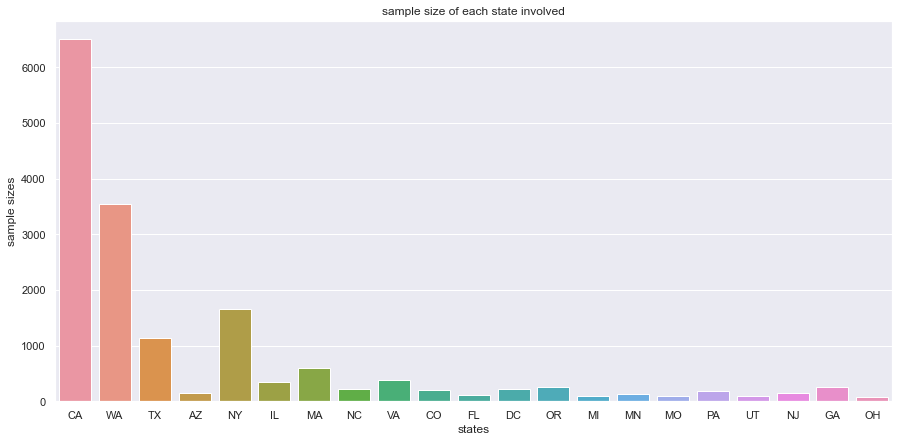

In [63]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=state_name, y=sample_size);
plt.xlabel('states')
plt.ylabel('sample sizes')
plt.title('sample size of each state involved')
plt.show()

From the graph `sample size of each state involved`, California (CA), Washington (WA), Texas (TX), New York State (NY) have the largest sample sizes in this data set.

To analyze salaries, I will generate a dataframe named `df` containing columns `state` and `salary` to include the salary of the individual of `state_salary` and his/her corresponding state name.

In [64]:
rows_num_per_state = {}
for i in range(len(state_name)):
    rows_num_per_state[state_name[i]] = len(state_salary[i])
state_to_fillin = []
for i in rows_num_per_state.keys():
    state_to_fillin += [i] * rows_num_per_state[i]

individual_salary = []
for i in state_salary:
    for x in i:
        individual_salary.append(x)

In [65]:
df = pd.DataFrame()
df['state'] = state_to_fillin
df['salary'] = individual_salary
df.head()

,state,salary
0,CA,5.0
1,CA,6.0
2,CA,5.0
3,CA,5.0
4,CA,6.0


    - Mean & Median salaries

In [66]:
df_grouped = df.groupby('state')
print(df_grouped.median())

       salary
state        
AZ        5.0
CA        6.0
CO        6.0
DC        6.0
FL        5.0
GA        5.0
IL        5.0
MA        6.0
MI        5.0
MN        5.0
MO        4.0
NC        6.0
NJ        5.0
NY        5.0
OH        6.0
OR        8.0
PA        5.0
TX        6.0
UT        5.0
VA        4.0
WA        6.0


In [67]:
print(df_grouped.mean())

         salary
state          
AZ     6.915033
CA     7.299954
CO     7.256158
DC     7.409091
FL     8.127119
GA     6.952756
IL     6.287791
MA     7.013180
MI     6.951456
MN     7.015748
MO     5.955056
NC     8.223256
NJ     7.104895
NY     6.445913
OH     7.530120
OR     9.849421
PA     6.272251
TX     7.475482
UT     6.112360
VA     6.480620
WA     7.431998


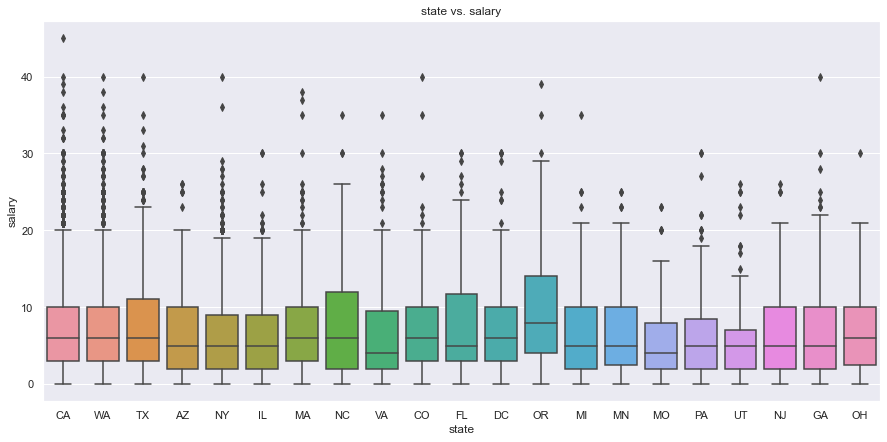

In [68]:
f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x='state', y='salary', data=df);
plt.title('state vs. salary')
plt.show()

Surprisingly, I observe the mean & median salaries of companies in Oregon (OR) are the highest, which is out of my expectation.

- International countries

I want to study on the level of a country for international cities. I grouped different cities into countries and stored the result in a variable called `foreign_country`.

In [69]:
foreign_country = []
for i in foreign_city:
    start = i.rfind(',')
    if i[start+2:] not in foreign_country:
        foreign_country.append(i[start+2:])

In [70]:
print(foreign_country)

['Canada', 'India', 'United Kingdom', 'Hong Kong (SAR)', 'China', 'Ireland', 'Germany', 'Russia', 'Israel', 'Singapore', 'Netherlands', 'Czech Republic', 'France', 'Japan', 'Switzerland', 'Poland', 'Brazil', 'Australia', 'Spain', 'Ukraine', 'Italy', 'Romania', 'South Africa', 'Hungary', 'Serbia', 'Portugal', 'Indonesia', 'Moldova', 'Taiwan', 'Malaysia', 'United Arab Emirates', 'Sweden', 'New Zealand', 'Saudi Arabia', 'Argentina', 'Peru', 'Philippines', 'Norway', 'Estonia', 'Belarus', 'Mexico', 'Austria', 'South', 'Finland', 'Vietnam', 'Qatar', 'Luxembourg', 'Costa Rica', 'Colombia', 'Slovakia', 'Denmark', 'Belgium', 'Latvia', 'Kenya', 'Thailand', 'Bulgaria', 'Chile', 'Lithuania', 'Ghana', 'Kazakhstan', 'Nigeria', 'Uzbekistan', 'Armenia', 'Egypt']


We want to focus on the sample size of each country, and the mean and median salaries of each country. I will create a dictionary called `dict_foreign_country`, whose values document the index in the cleaned dataset (on position 0) and salaries (on position 1) of the corresponding country.

In [71]:
dict_foreign_country = {}
for i in foreign_country:
    dict_foreign_country[i] = [[], []]

for i in salary_clean.index:
    location = salary_clean.loc[i, 'location']
    start = location.rfind(',')
    key = location[start+2:]
    if key in foreign_country:
        dict_foreign_country[key][0].append(i)
        dict_foreign_country[key][1].append(salary_clean.loc[i, 'yearsofexperience'])

    - Sample sizes

I want to focus on countries whose sample sizes are bigger than **50** for later analysis. Otherwise, the uncoverage bias caused by a tiny sample size will disrupt my research and analysis reliability.

In [72]:
country_name = []
sample_size = []
country_salary = []
for i in dict_foreign_country.keys():
    if len(dict_foreign_country[i][0]) > 50:
        country_name.append(i)
        sample_size.append(len(dict_foreign_country[i][0]))
        country_salary.append(dict_foreign_country[i][1])

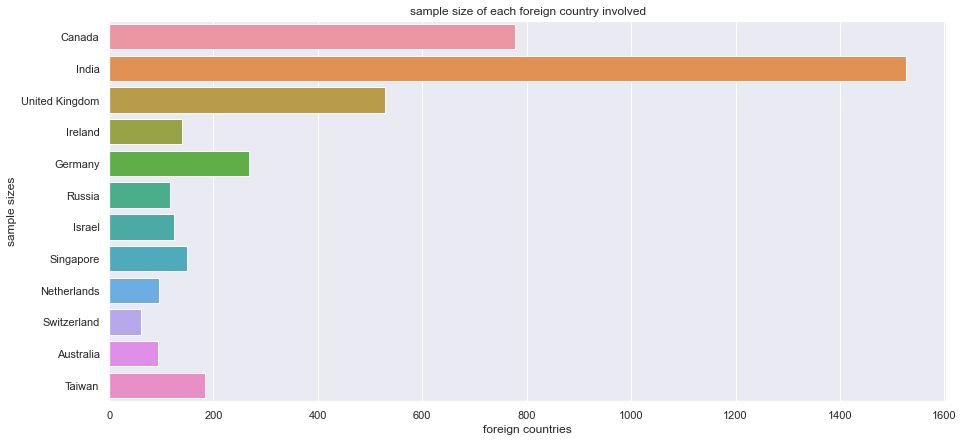

In [73]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=sample_size, y=country_name, orient='h');
plt.xlabel('foreign countries')
plt.ylabel('sample sizes')
plt.title('sample size of each foreign country involved')
plt.show()

In this dataset, Canada, India, and United Kindom have the largest sample sizes.

    - Mean & median salaries

To analyze salaries, I will generate a dataframe named `df2` containing columns `country` and `salary` to include the salary of the individual of `country_salary` and his/her corresponding country name.

In [74]:
rows_num_per_country = {}
for i in range(len(country_name)):
    rows_num_per_country[country_name[i]] = len(country_salary[i])
country_to_fillin = []
for i in rows_num_per_country.keys():
    country_to_fillin += [i] * rows_num_per_country[i]

country_individual_salary = []
for i in country_salary:
    for x in i:
        country_individual_salary.append(x)

In [75]:
df2 = pd.DataFrame()
df2['country'] = country_to_fillin
df2['salary'] = country_individual_salary
df2.head()

,country,salary
0,Canada,9.0
1,Canada,1.0
2,Canada,3.0
3,Canada,4.0
4,Canada,11.0


In [76]:
df2_grouped = df2.groupby('country')
print(df2_grouped.median())

                salary
country               
Australia          6.0
Canada             5.0
Germany            7.0
India              5.0
Ireland            6.0
Israel             7.0
Netherlands        9.0
Russia             6.0
Singapore          5.0
Switzerland        5.0
Taiwan             6.0
United Kingdom     6.0


In [77]:
print(df2_grouped.mean())

                  salary
country                 
Australia       7.956989
Canada          6.316602
Germany         7.145522
India           6.356254
Ireland         7.100719
Israel          8.411290
Netherlands     8.760417
Russia          7.224138
Singapore       6.147651
Switzerland     7.344262
Taiwan          6.704918
United Kingdom  7.011364


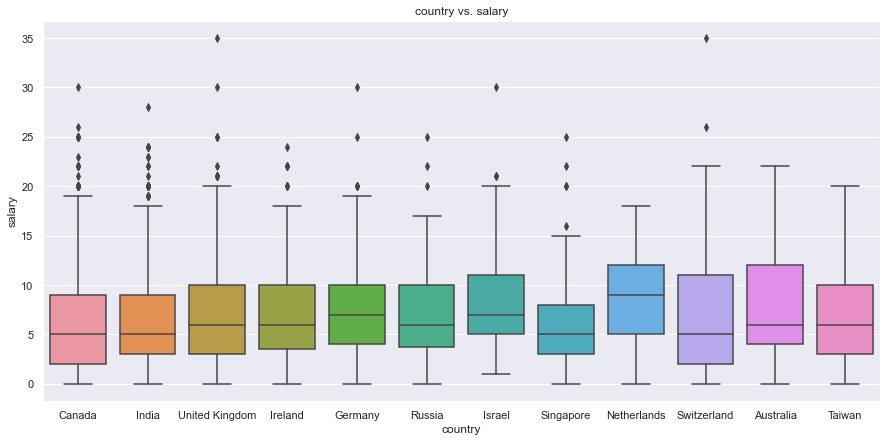

In [78]:
f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x='country', y='salary', data=df2);
plt.title('country vs. salary')
plt.show()

Surprisingly, I find the mean & median of salaries in Netherlands is the highest, which is out of my expectation.

### Questions for reviewers

- I removed states and countries whose sample sizes are smaller than 50 to minimize uncoverage bias. But the results were out of my expectations. What could be a possible explanation that Oregon has the highest median salaries within the United States, and why the Netherlands has the highest median salaries? Because neither of them seems to have strong IT industries, it seems unreasonable from the statistics that the salary levels in these 2 places are higher than in other places. Should I increase a minimal size of 50 to 100 or even higher?
- I tried to analyze every predictor variable with other variables, and sometimes I think I am overdoing it. For example, I tried to study the relationship between total yearly compensation, years of experience, base salary and bonus, for each of **gender**, **education**, **races**. It seems to be a huge load, especially for later phases (building models and further analysis). Should I keep what I now have, or should I curtail somehow?

Thank you very much for your patience reading my report!